In [1]:
import ibm_db

In [2]:
%load_ext sql

In [3]:
# I have to take this code block out, since it shows the username, password, host name and port number for my IBM Db service. 

'Connected: jvl15079@BLUDB'

In [31]:
# Load the data.
import pandas as pd
df=pd.read_csv("Red_wine_quality.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


I want to calculate the average of each factor for each wine quality score, sql is more convenient for this purpose. 

In [32]:
# The output for this sql query is collapsed since it has the username, password, hostname, port number for my IMB Db service as well.
Avg = %sql SELECT quality, avg(fixed_acidity) as avg_fixed_acidity, avg(volatile_acidity) as avg_volatile_acidity ,avg(citric_acid) as avg_citric_acid ,avg(residual_sugar) as avg_residual_sugar,avg(chlorides) as avg_chlorides, avg(free_sulfur_dioxide) as avg_free_sulfur_dioxide,avg(density) as avg_density,avg(sulphates) as avg_sulphates, avg(alcohol) as avg_alcohol FROM df GROUP BY quality

 * ibm_db_sa://jvl15079:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


In [33]:
# Convert the result of the sql query to csv format and store it in the local directory.
Avg=Avg.csv("Avg.csv")

In [34]:
# Load the csv document as pandas dataframe.
avg=pd.read_csv("Avg.csv")
avg

,quality,avg_fixed_acidity,avg_volatile_acidity,avg_citric_acid,avg_residual_sugar,avg_chlorides,avg_free_sulfur_dioxide,avg_density,avg_sulphates,avg_alcohol
0,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,0.997464,0.570000,9.955000
1,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,0.996542,0.596415,10.265094
2,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,0.997104,0.620969,9.899706
3,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,0.996615,0.675329,10.629519
4,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,0.996104,0.741256,11.465913
5,8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,0.995212,0.767778,12.094444


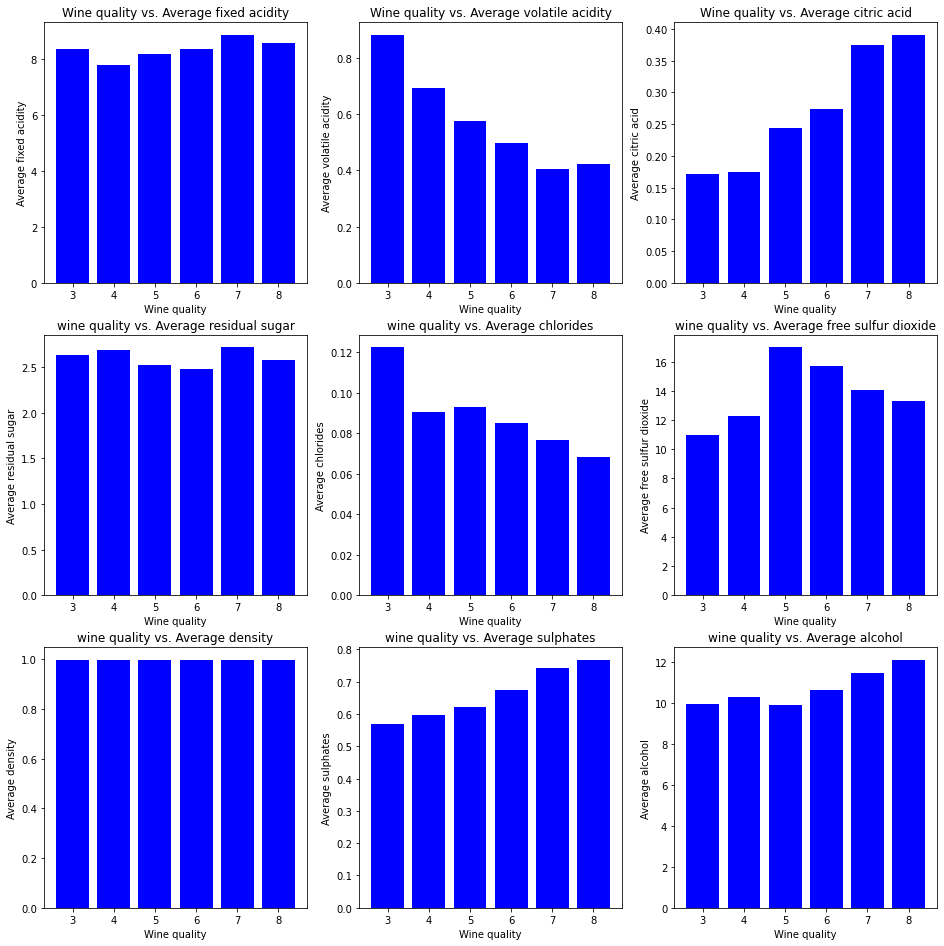

In [35]:
# plot the nine attributes in one code block.

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12)) # create figure

ax0 = fig.add_subplot(3, 3, 1) # add subplot 1 (4 row, 3 columns, first plot)
ax1 = fig.add_subplot(3, 3, 2) # add subplot 2 (4 row, 3 columns, second plot). See tip below**
ax2 = fig.add_subplot(3, 3, 3) # subplot 3 (4 rows, 3 columns, 3rd plot )
ax3 = fig.add_subplot(3,3,4)
ax4 = fig.add_subplot(3,3,5)
ax5 = fig.add_subplot(3,3,6)
ax6 = fig.add_subplot(3,3,7)
ax7 = fig.add_subplot(3,3,8)
ax8 = fig.add_subplot(3,3,9)

ax0.bar(avg["quality"],avg["avg_fixed_acidity"], color='blue') # add to subplot 1
ax0.set_title('Wine quality vs. Average fixed acidity')
ax0.set_xlabel('Wine quality')
ax0.set_ylabel('Average fixed acidity')

ax1.bar(avg["quality"],avg["avg_volatile_acidity"], color='blue',) # add to subplot 1
ax1.set_title('Wine quality vs. Average volatile acidity')
ax1.set_xlabel('Wine quality')
ax1.set_ylabel('Average volatile acidity')

ax2.bar(avg["quality"],avg["avg_citric_acid"], color='blue',) # add to subplot 1
ax2.set_title('Wine quality vs. Average citric acid')
ax2.set_xlabel('Wine quality')
ax2.set_ylabel('Average citric acid')

ax3.bar(avg["quality"],avg["avg_residual_sugar"], color='blue') # add to subplot 1
ax3.set_title('wine quality vs. Average residual sugar')
ax3.set_xlabel('Wine quality')
ax3.set_ylabel('Average residual sugar')

ax4.bar(avg["quality"],avg["avg_chlorides"], color='blue') # add to subplot 1
ax4.set_title('wine quality vs. Average chlorides')
ax4.set_xlabel('Wine quality')
ax4.set_ylabel('Average chlorides')

ax5.bar(avg["quality"],avg["avg_free_sulfur_dioxide"], color='blue') # add to subplot 1
ax5.set_title('wine quality vs. Average free sulfur dioxide')
ax5.set_xlabel('Wine quality')
ax5.set_ylabel('Average free sulfur dioxide')

ax6.bar(avg["quality"],avg["avg_density"], color='blue') # add to subplot 1
ax6.set_title('wine quality vs. Average density')
ax6.set_xlabel('Wine quality')
ax6.set_ylabel('Average density')

ax7.bar(avg["quality"],avg["avg_sulphates"], color='blue') # add to subplot 1
ax7.set_title('wine quality vs. Average sulphates')
ax7.set_xlabel('Wine quality')
ax7.set_ylabel('Average sulphates')

ax8.bar(avg["quality"],avg["avg_alcohol"], color='blue') # add to subplot 1
ax8.set_title('wine quality vs. Average alcohol')
ax8.set_xlabel('Wine quality')
ax8.set_ylabel('Average alcohol')

plt.subplots_adjust(top = 1.15)
plt.show()

In each of the subplot above, the x-axis represents the wine quality, the y-axis represents a factor that a factor that affects the wine's quality. All the wines in this dataset are red wine. For a lot of factors, there are no apparent correlation between the wines' quality and those factors. However, there are a few interesting patterns here: (1) higher quality wines have lower volatile acidity (2nd subplot; (2) higher quality wines have higher citric acid (3rd subplot; (3) higher quality wines have higher sulphates (8th subplot); (4) higher quality wines also tend to have higher alcohol, although this pattern is not very obvious (9th subplot).

Next, let's build a multi-class neural network using keras to predict the wine's class. 

In [36]:
#  standardize the data
from sklearn import preprocessing
X=df.drop(["quality"],axis=1)
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=names)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


### Multi-classification Neural Network with Keras

In [97]:
# split the dataset into test and train subsets
from sklearn.model_selection import train_test_split
y=df[["quality"]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [98]:
length=X_train.shape[1]
length

11

In [99]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_test.shape[1]
print(num_classes)

9


In [100]:
# Load the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(600, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [101]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 1199 samples, validate on 400 samples
Epoch 1/100
 - 3s - loss: 1.3866 - acc: 0.5263 - val_loss: 1.1283 - val_acc: 0.5225
Epoch 2/100
 - 1s - loss: 1.1067 - acc: 0.5580 - val_loss: 1.0444 - val_acc: 0.5225
Epoch 3/100
 - 1s - loss: 1.0535 - acc: 0.5630 - val_loss: 1.0157 - val_acc: 0.5350
Epoch 4/100
 - 1s - loss: 1.0148 - acc: 0.5888 - val_loss: 1.0183 - val_acc: 0.5275
Epoch 5/100
 - 1s - loss: 1.0022 - acc: 0.5830 - val_loss: 0.9833 - val_acc: 0.5600
Epoch 6/100
 - 1s - loss: 0.9903 - acc: 0.5988 - val_loss: 0.9865 - val_acc: 0.5575
Epoch 7/100
 - 1s - loss: 0.9840 - acc: 0.6047 - val_loss: 0.9708 - val_acc: 0.5675
Epoch 8/100
 - 0s - loss: 0.9659 - acc: 0.6105 - val_loss: 1.0007 - val_acc: 0.5250
Epoch 9/100
 - 1s - loss: 0.9715 - acc: 0.6113 - val_loss: 0.9555 - val_acc: 0.5675
Epoch 10/100
 - 1s - loss: 0.9551 - acc: 0.6264 - val_loss: 0.9577 - val_acc: 0.5750
Epoch 11/100
 - 1s - loss: 0.9530 - acc: 0.6088 - val_loss: 0.9541 - val_acc: 0.5650
Epoch 12/100
 - 1s - loss: 

[0.9216600036621094, 0.58]

Accuracy is only 58%. The regression model does not look very good. Let's try a regression model and see if a refression model can do a better job predicting a wine's quality. 

### Neural network regression with Keras

In [102]:
# define regression model
num_cols=X.shape[1]
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(num_cols,)))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(300, activation ='relu'))
    model.add(Dense(100,activation='tanh'))
    model.add(Dense(1))
# "50" is the number of nodes in each of the three hidden layers.    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [103]:
# build the model
model = regression_model()

In [110]:
# fit the model
model.fit(X, y, validation_split=0.3, epochs=50, verbose=2)

Train on 1119 samples, validate on 480 samples
Epoch 1/50
 - 1s - loss: 0.1286 - val_loss: 0.7662
Epoch 2/50
 - 1s - loss: 0.1063 - val_loss: 0.6506
Epoch 3/50
 - 1s - loss: 0.1409 - val_loss: 0.6141
Epoch 4/50
 - 1s - loss: 0.1161 - val_loss: 0.6713
Epoch 5/50
 - 1s - loss: 0.0825 - val_loss: 0.7388
Epoch 6/50
 - 1s - loss: 0.0716 - val_loss: 0.7257
Epoch 7/50
 - 1s - loss: 0.0711 - val_loss: 0.7134
Epoch 8/50
 - 1s - loss: 0.0601 - val_loss: 0.7059
Epoch 9/50
 - 1s - loss: 0.0544 - val_loss: 0.6968
Epoch 10/50
 - 2s - loss: 0.0461 - val_loss: 0.6709
Epoch 11/50
 - 1s - loss: 0.0492 - val_loss: 0.7085
Epoch 12/50
 - 1s - loss: 0.0658 - val_loss: 0.6786
Epoch 13/50
 - 1s - loss: 0.0483 - val_loss: 0.6986
Epoch 14/50
 - 1s - loss: 0.0473 - val_loss: 0.7242
Epoch 15/50
 - 1s - loss: 0.0428 - val_loss: 0.6813
Epoch 16/50
 - 1s - loss: 0.0354 - val_loss: 0.7280
Epoch 17/50
 - 2s - loss: 0.0370 - val_loss: 0.7138
Epoch 18/50
 - 1s - loss: 0.0326 - val_loss: 0.6917
Epoch 19/50
 - 2s - loss: 

In [116]:
import math
print ("The root mean square error is: ", math.sqrt(0.7843))

The root mean square error is:  0.885607136375944


The root mean squared error is 0.885. That means on average, the predicted wine quality score is about 0.89 away from (either above or below) the actual wine quality score. For example, for a quality score of 8, the predicted score could range from 7.12 to 8.88, or 7 to 9 with rounding. For a quality score of 3, the predicted score would range from 2.12 to 3.88, or 2 to 4 with rounding. 

Visualize how the actual wine quality scores compare to the predicted wine quality score.

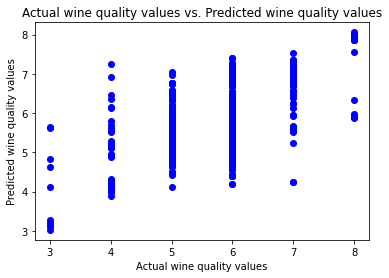

In [111]:
y_pred=model.predict(X)

plt.scatter(y, y_pred,color='blue')
plt.title('Actual wine quality values vs. Predicted wine quality values')
plt.xlabel('Actual wine quality values')
plt.ylabel('Predicted wine quality values')
plt.show()


In [112]:
from sklearn.metrics import r2_score
print("The R-squared is: ", r2_score(y,y_pred))

The R-squared is:  0.6224277314909985


R-squared from the regression model is only 0.6224. 62.24% of the variation in the wine quality score could be explained by the variation in the attributes. That is fair but not good enough. Let's try one more neural network model with decision tree classification.

### Multi-label decision tree classification

In [113]:
from sklearn.tree import DecisionTreeClassifier
WineQuality=DecisionTreeClassifier(criterion="entropy",max_depth=25)
WineQuality

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
WineQuality.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
pred_quality=WineQuality.predict(X_test)
from sklearn import metrics
print("Decision tree's accuracy is: ",metrics.accuracy_score(y_test,pred_quality))

Decision tree's accuracy is:  0.6075


The decision tree model has an accuracy of 60.75%, slightly better than that of the neural network model. 